In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

from get_data import create_dataframe

sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

username = "'Tiago'"

df = create_dataframe(username)

categories = df['Category'].unique()

df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category].copy()
    try:
        df_category['Value'] = df_category['Value'].astype('float64')
        print(df_category['Category'].iloc[0], ' - Float')
    except ValueError:
        print(df_category['Category'].iloc[0], ' - str')
        pass 
    df_categories.append(df_category)

Alimentação  - Float
Casa  - Float
Compras  - Float
Entretenimento  - Float
Gastos  - Float
Gym  - str
Livros  - Float
Outros  - Float
Review  - str
Tarot  - Float
Transporte  - Float
Trotinete  - Float


In [7]:
category = 'Transporte'
range_begin = '2023-01-01'
range_end = '2023-01-31'

df_category = df_categories[categories.tolist().index(category)]
df_category = df_category.loc[(df_category['Date'] >= range_begin) & (df_category['Date'] <= range_end)]

types = df_category['Type'].unique()

print('Category:', category, 'between', range_begin,'and', range_end,'\n')
total_sum = []
for each_type in types:
    df_type = df_category.loc[df_category['Type'] == each_type]

    type_freq = df_type.count()[0]
    type_sum = sum(df_type['Value'])
    total_sum.append(type_sum)

    print(type_freq, '-', each_type + ': %.2f' % type_sum)

print('\nTotal: %.2f' % sum(total_sum))

Category: Transporte between 2023-01-01 and 2023-01-31 

18 - Autocarro: 19.00
3 - Gira: 3.00
3 - Metro: 3.00
11 - Uber: 65.38

Total: 90.38


In [8]:
def get_df_category(category, range_begin, range_end):
    df_category = df_categories[categories.tolist().index(category)]
    df_category = df_category.loc[(df_category['Date'] >= range_begin) & (df_category['Date'] <= range_end)]
    types = df_category['Type'].unique()

    print('Category:', category, 'between', range_begin,'and', range_end,'\n')
    print('Averages')
    total_sum = []
    for each_type in types:
        df_type = df_category.loc[df_category['Type'] == each_type]
        type_freq = df_type.count()[0]
        type_sum = sum(df_type['Value'])
        total_sum.append(type_sum)
        print(type_freq, '-', each_type + ': %.2f' % (type_sum/type_freq))
    return df_category


In [9]:
category = 'Trotinete'
range_begin = '2023-01-01'
range_end = '2023-04-30'

df_trotinete = get_df_category(category, range_begin, range_end)

Category: Trotinete between 2023-01-01 and 2023-04-30 

Averages
21 - Bateria: 21.00
21 - Distancia: 4.42
21 - Velocidade media: 21.26


In [10]:
df_trotinete['Date'] = pd.to_datetime(df_trotinete['Date'])
df_trotinete.set_index('Date', inplace=True)

df_trotinete = df_trotinete.pivot(columns='Type', values='Value')
df_trotinete.columns = ['Battery', 'Distance', 'Speed']

df_trotinete['Battery'] = df_trotinete['Battery'].astype(float)
df_trotinete['Distance'] = df_trotinete['Distance'].astype(float)
df_trotinete['Speed'] = df_trotinete['Speed'].astype(float)

C:\Users\tiago\AppData\Local\Temp\ipykernel_20928\1330902724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trotinete['Date'] = pd.to_datetime(df_trotinete['Date'])


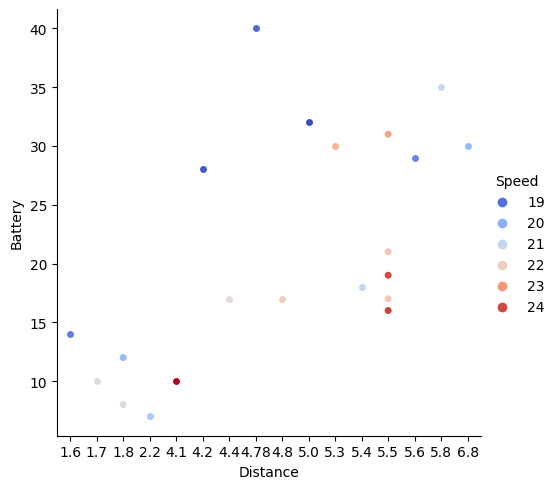

In [11]:
sns.catplot(data=df_trotinete, x='Distance', y='Battery', hue='Speed', kind="swarm",palette=sns.color_palette("coolwarm", as_cmap=True))

<AxesSubplot: xlabel='Distance', ylabel='Count'>

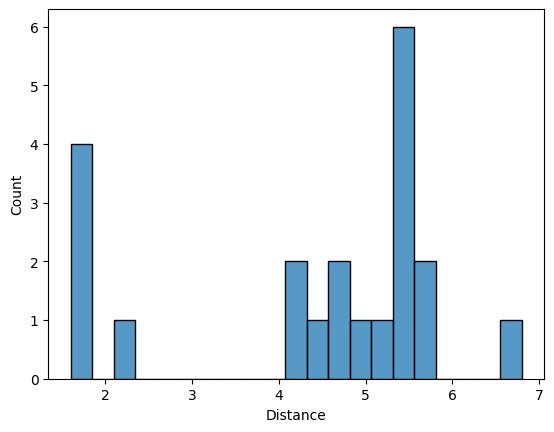

In [12]:
sns.histplot(data=df_trotinete,x='Distance',bins=len(df_trotinete))

<AxesSubplot: xlabel='Distance', ylabel='Battery'>

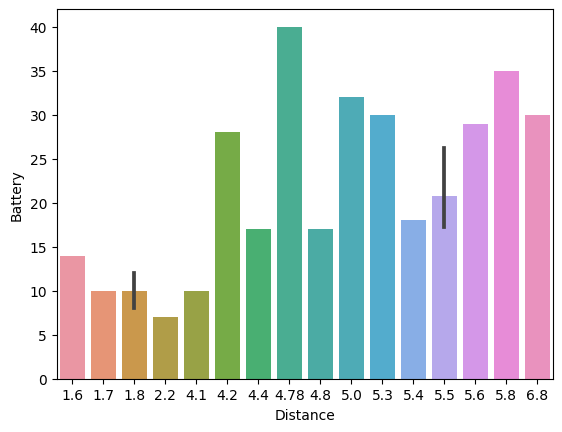

In [13]:
sns.barplot(data=df_trotinete, x='Distance', y='Battery')

In [14]:
df_trotinete['Battery per Km'] = round(df_trotinete['Battery'] / df_trotinete['Distance'], 1)
df_trotinete['Duration'] = round((df_trotinete['Distance'] / df_trotinete['Speed']) * 60, 0)

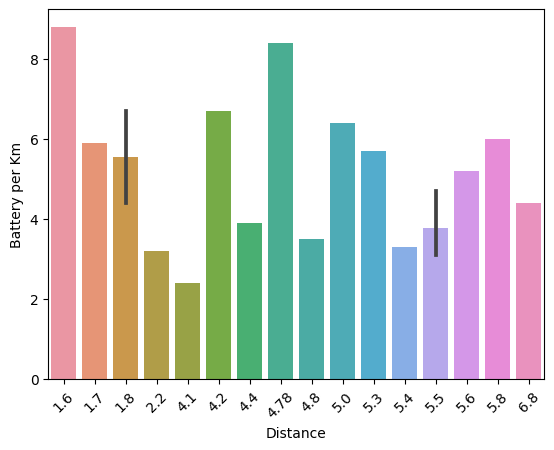

In [15]:
sns.barplot(data=df_trotinete, x='Distance', y='Battery per Km')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='Distance', ylabel='Duration'>

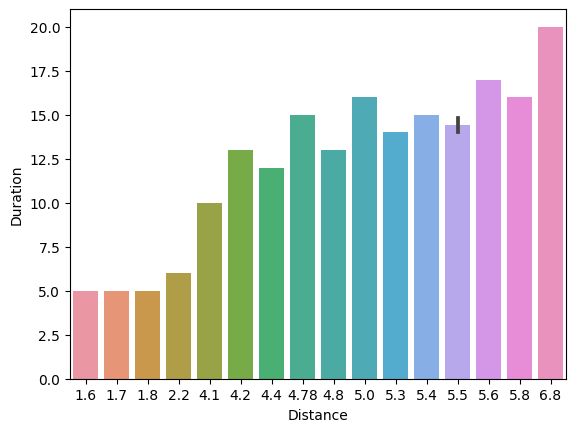

In [16]:
sns.barplot(data=df_trotinete, x='Distance', y='Duration')

<AxesSubplot: xlabel='Duration', ylabel='count'>

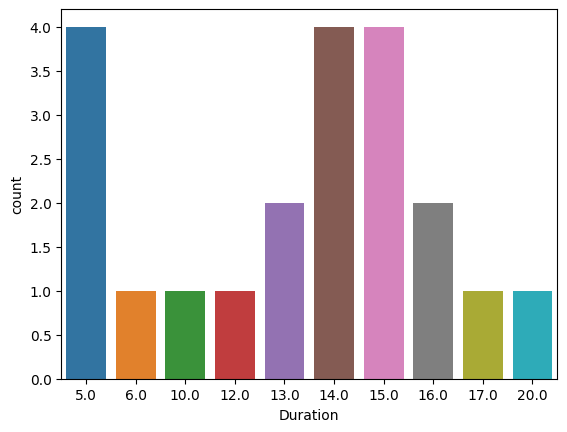

In [17]:
sns.countplot(data=df_trotinete, x='Duration')

<AxesSubplot: xlabel='Battery per Km', ylabel='count'>

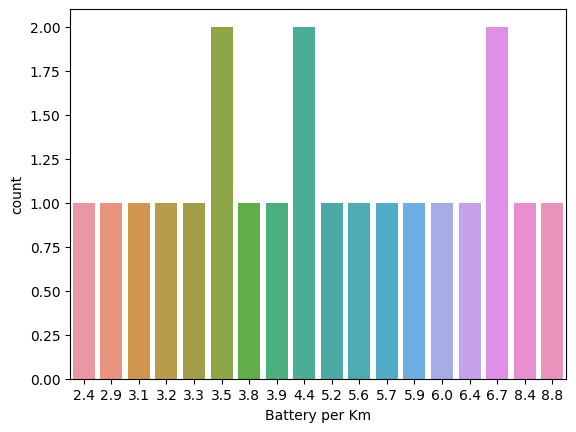

In [18]:
sns.countplot(data=df_trotinete, x='Battery per Km')

In [19]:
print('Duration in minutes:')
print('Mean:', round(df_trotinete['Duration'].mean(), 2))
print('Std:', round(df_trotinete['Duration'].std() , 2))
print('Max:', df_trotinete['Duration'].max())
print('Min:', df_trotinete['Duration'].min())

Duration in minutes:
Mean: 12.33
Std: 4.52
Max: 20.0
Min: 5.0


Category: Casa between 2022-01-01 and 2023-04-30 

Averages
7 - Água: 13.78
7 - Luz: 50.53
2 - Moche: 18.94
2 - Nos: 26.49
2 - Passe: 22.50
1 - Poupança: 6500.00


C:\Users\tiago\AppData\Local\Temp\ipykernel_20928\1042717562.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_casa = df_casa.groupby([pd.Grouper(freq='M'), 'Type']).sum().reset_index()


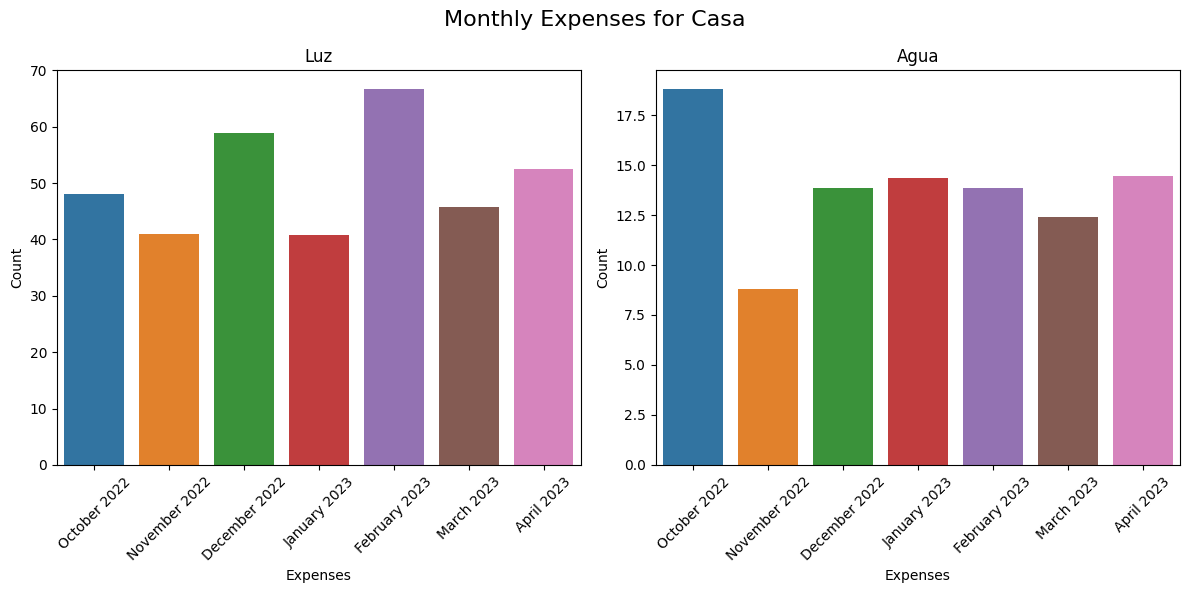

In [20]:
range_begin = '2022-01-01'
range_end = '2023-04-30'
df_casa = get_df_category('Casa', range_begin, range_end).copy()

df_casa['Date'] = pd.to_datetime(df_casa['Date'])
df_casa.set_index('Date', inplace=True)



df_casa = df_casa.groupby([pd.Grouper(freq='M'), 'Type']).sum().reset_index()
df_casa = df_casa.pivot(index='Date', columns='Type', values='Value')
df_casa.index = pd.to_datetime(df_casa.index) 
df_casa = df_casa.resample('M').sum().fillna(0) 
df_casa.index = df_casa.index.map(lambda x: x.strftime('%B %Y'))

plt.figure(figsize=(12, 6))
plt.suptitle('Monthly Expenses for Casa', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Luz')
sns.barplot(data=df_casa, x=df_casa.index, y='Luz')
plt.xlabel('Expenses')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.title('Agua')
sns.barplot(data=df_casa, x=df_casa.index, y='Água')
plt.xlabel('Expenses')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()